In [2]:
import caffe
import numpy as np
import matplotlib.pyplot as plt

model = './snapshot/boyhair2_deploy.prototxt';
weights = './snapshot/boyhair4_iter_1000000.caffemodel';

# model = './snapshot/googleNetDeploy.prototxt';
# weights = './snapshot/GoogleNet_SOS.caffemodel';

caffe.set_mode_gpu();
caffe.set_device(0);

# net = caffe.Net(model, weights, caffe.TEST);
net = caffe.Net(model, 1, weights=weights)
image = caffe.io.load_image('../boyhair4/001001.jpeg')
transformer = caffe.io.Transformer({'data': net.blobs['data'].data.shape})
transformer.set_transpose('data', (2,0,1))
transformer.set_channel_swap('data', (2,1,0)) 
net.blobs['data'].data[...] = transformer.preprocess('data', image)
out = net.forward()
print(out)

{'argmax': array([[[ 14.,   2.,   3.,  12.,   1.]]], dtype=float32)}


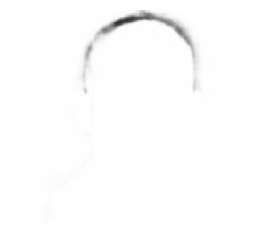

classify:[ 19.   0.  17.  16.   7.] real label:0 name : 001002.jpeg


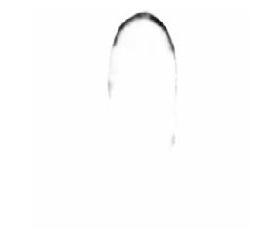

classify:[ 19.  17.  15.   0.   3.] real label:0 name : 001007.jpg


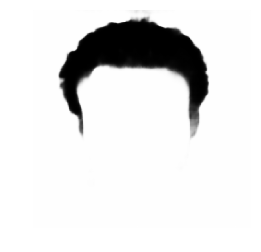

classify:[  8.   1.   4.   2.  13.] real label:1 name : 1076.png


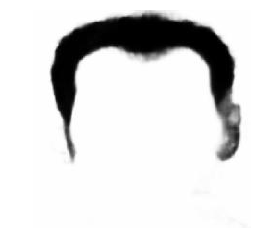

classify:[  7.  14.   8.   2.  19.] real label:1 name : 108（31bc）.jpeg


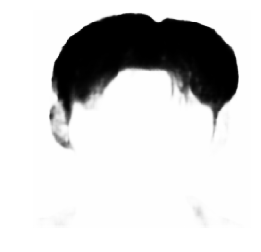

classify:[  2.   1.   9.  14.   8.] real label:10 name : 1990.png


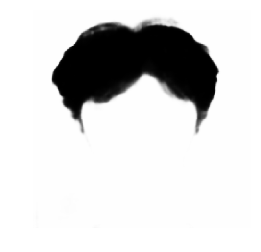

classify:[  2.  10.   9.   3.  18.] real label:10 name : 1991.png


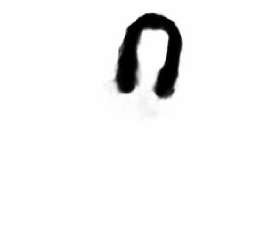

classify:[ 12.  16.   7.  14.  15.] real label:11 name : 2048.jpg


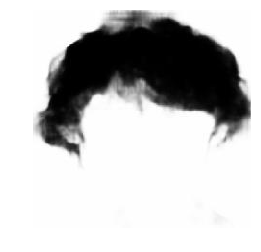

classify:[ 14.   6.   3.   5.  13.] real label:13 name : 1807.jpg


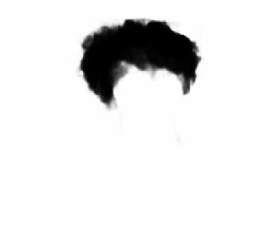

classify:[  5.   9.   3.   6.  14.] real label:14 name : 1674.jpg


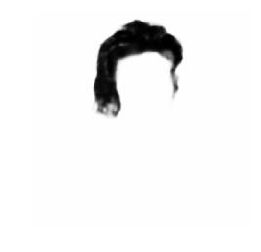

classify:[  8.  15.   4.   1.   7.] real label:18 name : 1778.jpg


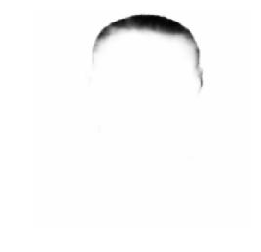

classify:[  0.  19.  17.  15.   7.] real label:19 name : 2076.jpg


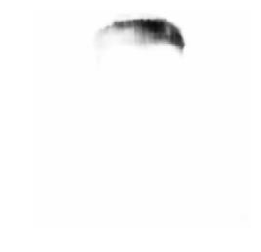

classify:[  0.  19.  17.   9.   2.] real label:19 name : 2077.jpg


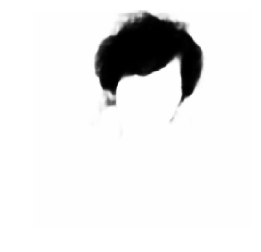

classify:[  3.   9.   1.  14.  15.] real label:2 name : 001229.png


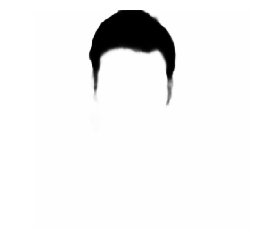

classify:[ 8.  3.  2.  4.  1.] real label:2 name : 001230.png


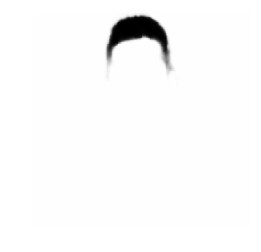

classify:[  0.   4.  16.  17.  15.] real label:2 name : 0584.png


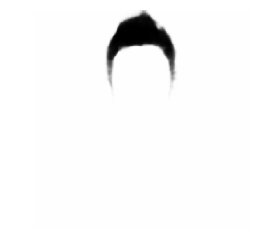

classify:[ 4.  0.  2.  1.  8.] real label:2 name : 0617.png


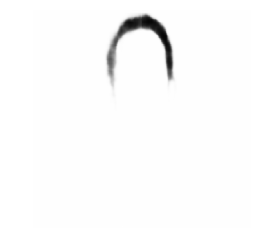

classify:[  0.  16.   1.  12.  15.] real label:2 name : 0621.png


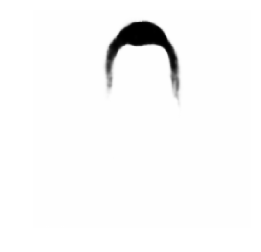

classify:[  0.   1.  16.  15.   2.] real label:2 name : 0629.png


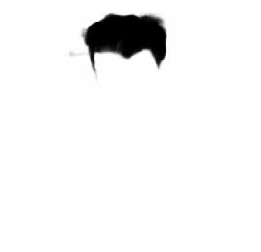

classify:[  2.   3.  14.   8.   6.] real label:3 name : 1498.jpg


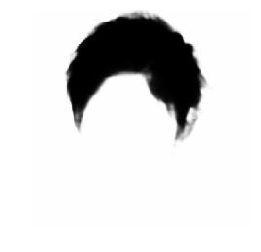

classify:[  9.   5.   3.  14.  12.] real label:3 name : 1501.jpg


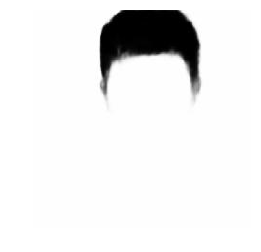

classify:[ 2.  8.  1.  4.  3.] real label:3 name : 1506.jpg


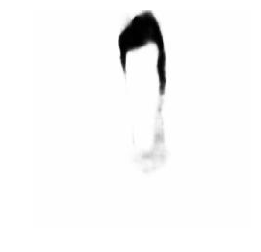

classify:[ 17.  19.  15.   4.  12.] real label:4 name : 1045.jpeg


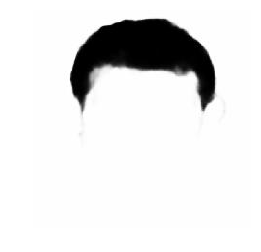

classify:[ 1.  0.  4.  8.  2.] real label:4 name : 1049.jpeg


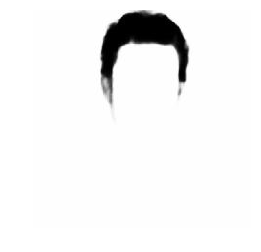

classify:[  1.   8.  18.   5.   2.] real label:4 name : 1050.jpeg


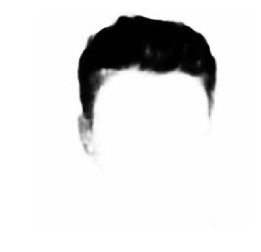

classify:[  1.   8.   5.   9.  15.] real label:4 name : 1052.jpeg


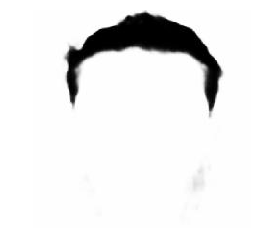

classify:[  0.  15.   5.   1.   8.] real label:4 name : 1053.jpeg


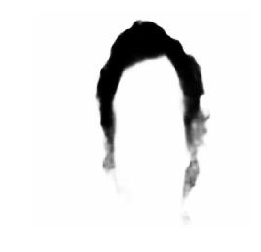

classify:[  7.  12.  15.   5.   0.] real label:5 name : 1556.jpeg


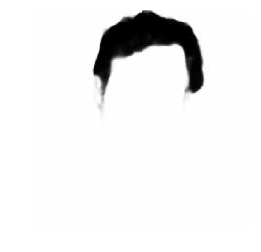

classify:[ 15.  16.   7.  17.   2.] real label:5 name : 1557.jpg


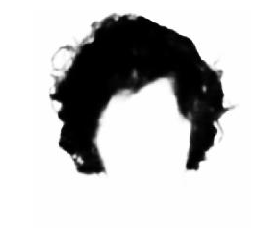

classify:[ 12.   5.   6.  14.  15.] real label:5 name : 1558.jpg


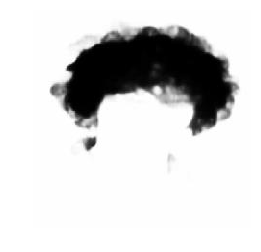

classify:[  3.   9.   5.  12.   6.] real label:6 name : 1916.jpg


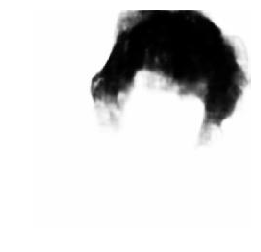

classify:[ 12.  14.   5.   9.   1.] real label:6 name : 1917.jpg


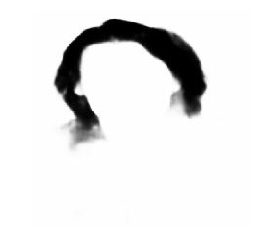

classify:[ 12.   7.  16.   5.  11.] real label:7 name : 1951.jpg


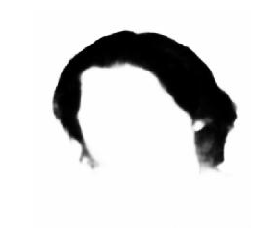

classify:[ 16.   2.  18.  13.   7.] real label:7 name : 1952.jpg


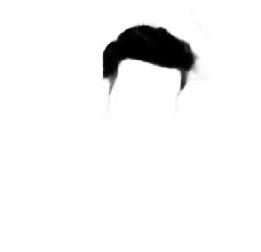

classify:[  2.   9.   3.  15.  14.] real label:8 name : 1293.jpeg


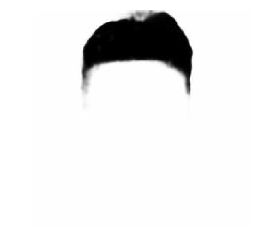

classify:[  4.   8.   1.  15.   2.] real label:8 name : 1294.jpeg


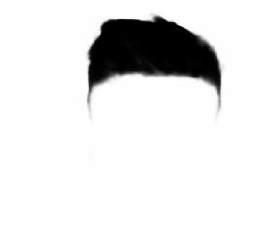

classify:[  4.   8.   1.  15.   2.] real label:8 name : 1295.jpeg


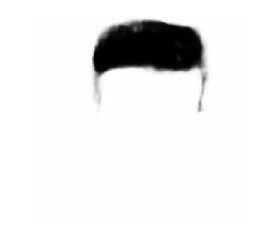

classify:[  4.   8.  14.   9.   1.] real label:8 name : 1297.jpeg


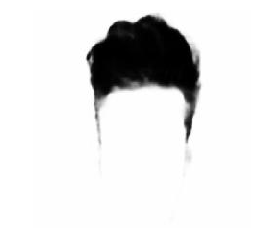

classify:[  3.   5.   9.   0.  14.] real label:8 name : 1305.jpeg


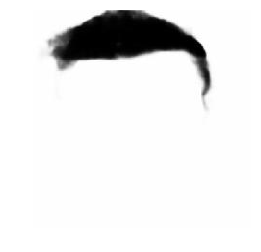

classify:[  8.   4.   1.   0.  15.] real label:9 name : 1738.jpg
total error cnt 39


In [2]:
import caffe
import numpy as np
import matplotlib.pyplot as plt
import csv



model = './snapshot/boyhair2_deploy.prototxt';
weights = './snapshot/boyhair4_iter_12129.caffemodel';

# model = './snapshot/googleNetDeploy.prototxt';
# weights = './snapshot/GoogleNet_SOS.caffemodel';

valFile = '../boyhair4/val.txt'
f = open(valFile)
data = f.readlines()
f.close()
reader = csv.reader(data, delimiter=' ')


caffe.set_mode_gpu();
caffe.set_device(0);

net = caffe.Net(model, weights, caffe.TEST);

transformer = caffe.io.Transformer({'data': net.blobs['data'].data.shape})
transformer.set_transpose('data', (2,0,1))
transformer.set_raw_scale('data', 255)
transformer.set_channel_swap('data', (2,1,0)) 
count = 0
for row in reader:
    # row : ['001.jpeg', '0']
    image = caffe.io.load_image('../boyhair4/' + row[0])
    net.blobs['data'].data[...] = transformer.preprocess('data', image)
    out = net.forward()
    if (np.squeeze(out['argmax'])[0] != int(row[1])) :
        #分类错误
        count = count + 1
        plt.imshow(image, cmap=plt.cm.gray) # 显示图片
        plt.axis('off') # 不显示坐标轴
        plt.show()
        print('classify:' + str(np.squeeze(out['argmax'])) + ' real label:' + row[1] + ' name : ' + row[0])
print('total error cnt '+ str(count))